# Super Bowl Data Analysis

## Import Data

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import CSV file using panda

In [2]:
super_bowl = pd.read_csv('Super_Bowl.csv', sep=',', encoding = "ISO-8859-1")
super_bowl['Coach Winner'].str.encode('utf-8').str.decode('ascii', 'ignore')
super_bowl.head(5)

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,...,City,State,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge
0,15-Jan-67,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,...,Los Angeles,California,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14-Jan-68,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,...,Miami,Florida,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-Jan-69,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,...,Miami,Florida,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-Jan-70,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,...,New Orleans,Louisiana,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17-Jan-71,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,...,Miami,Florida,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN


#### Column name foe Super bowl Dataframe

In [3]:
super_bowl.columns

Index(['Date', 'SB', 'Attendance', 'QB  Winner', 'Coach Winner', 'Winner',
       'Winning Pts', 'QB Loser', 'Coach Loser', 'Loser', 'Losing Pts', 'MVP',
       'Stadium', 'City', 'State', 'Point Difference', 'Referee', 'Umpire',
       'Head Linesman', 'Line Judge', 'Field Judge', 'Back Judge',
       'Side Judge'],
      dtype='object')

#### Plot Winner frequency

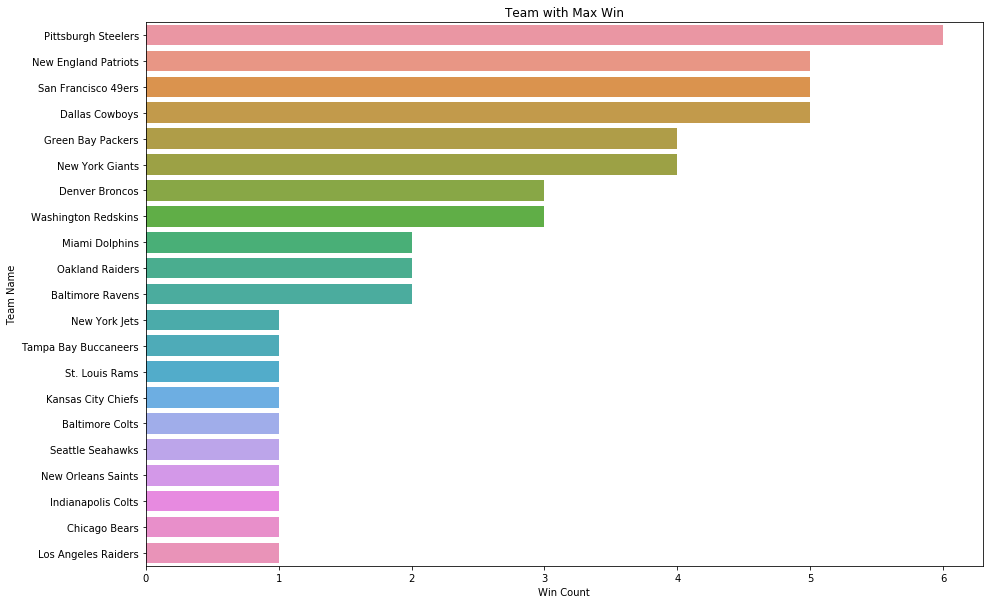

In [4]:
winner = super_bowl['Winner'].value_counts()
sns.barplot(y=winner.index, x=winner.values)
plt.title('Team with Max Win')
plt.xlabel('Win Count')
plt.ylabel('Team Name')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

#### Plot Coach Winner

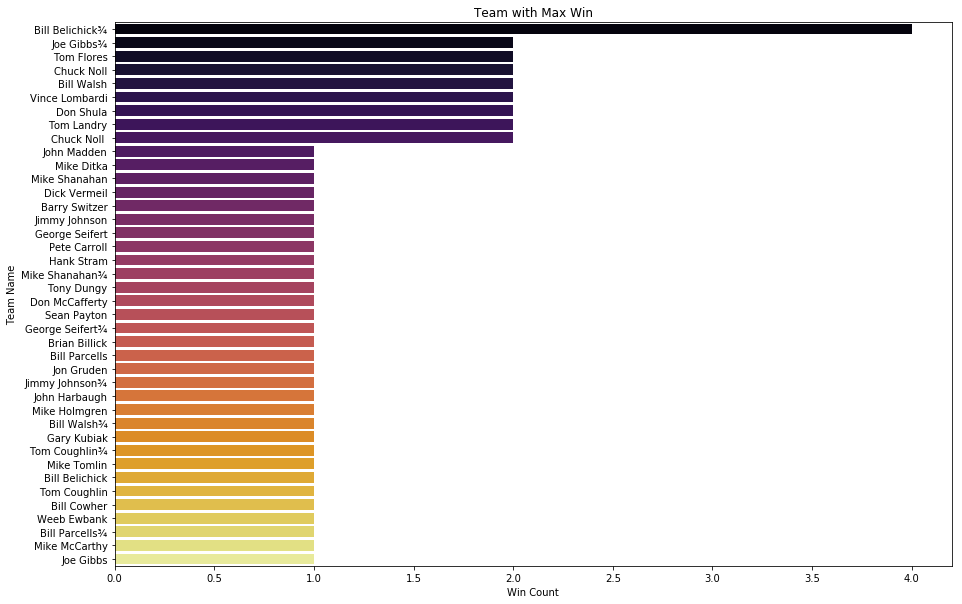

In [5]:
Cwinner = super_bowl['Coach Winner'].value_counts()
sns.barplot(y=Cwinner.index, x=Cwinner.values, palette='inferno')
plt.title('Team with Max Win')
plt.xlabel('Win Count')
plt.ylabel('Team Name')
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.show()

#### Winner And Winner Coach Compatibility

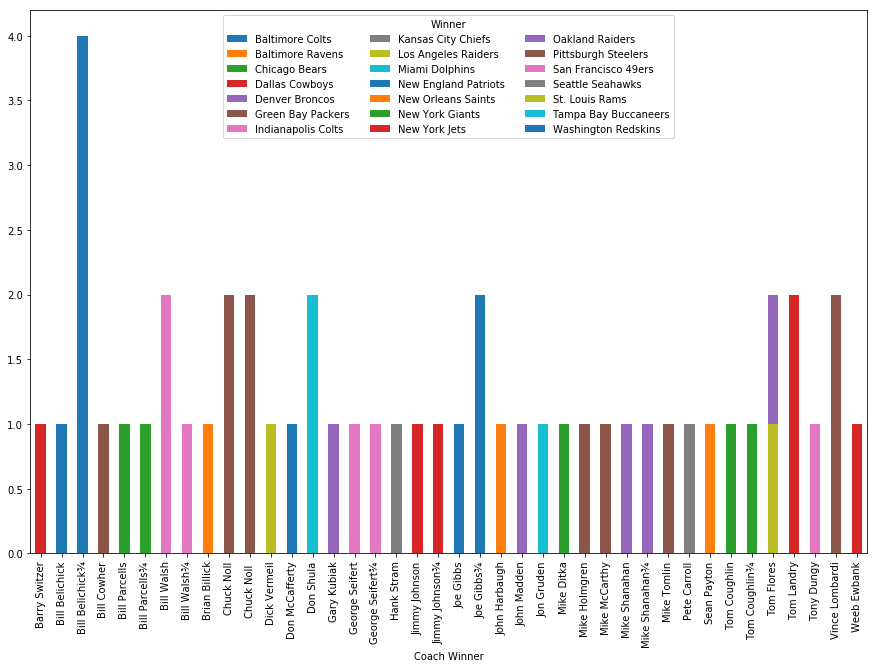

In [6]:
WnCWinner =pd.crosstab(super_bowl['Coach Winner'], super_bowl['Winner'])
WnCWinner.plot.bar(stacked=True)
plt.legend(title='Winner', loc='upper center',ncol=3, fancybox=True)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

#### Winner in City, State

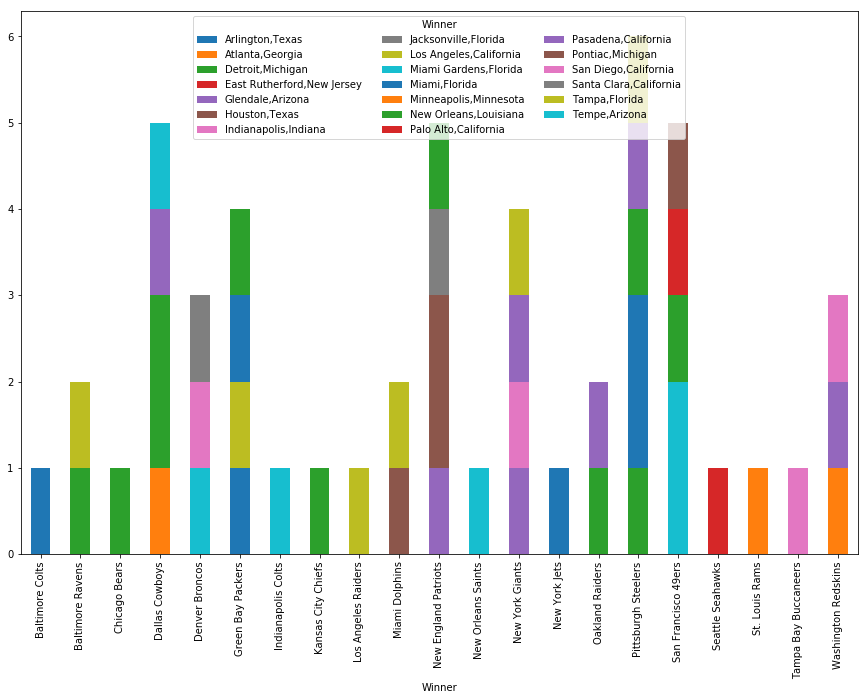

In [7]:
super_bowl['CityState'] = super_bowl['City']+ ','+super_bowl['State']
CSWinner =pd.crosstab(super_bowl['Winner'], super_bowl['CityState'])
CSWinner.plot.bar(stacked=True)
plt.legend(title='Winner', loc='upper center',ncol=3, fancybox=True)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show()

#### Winner and Loser Graph in One

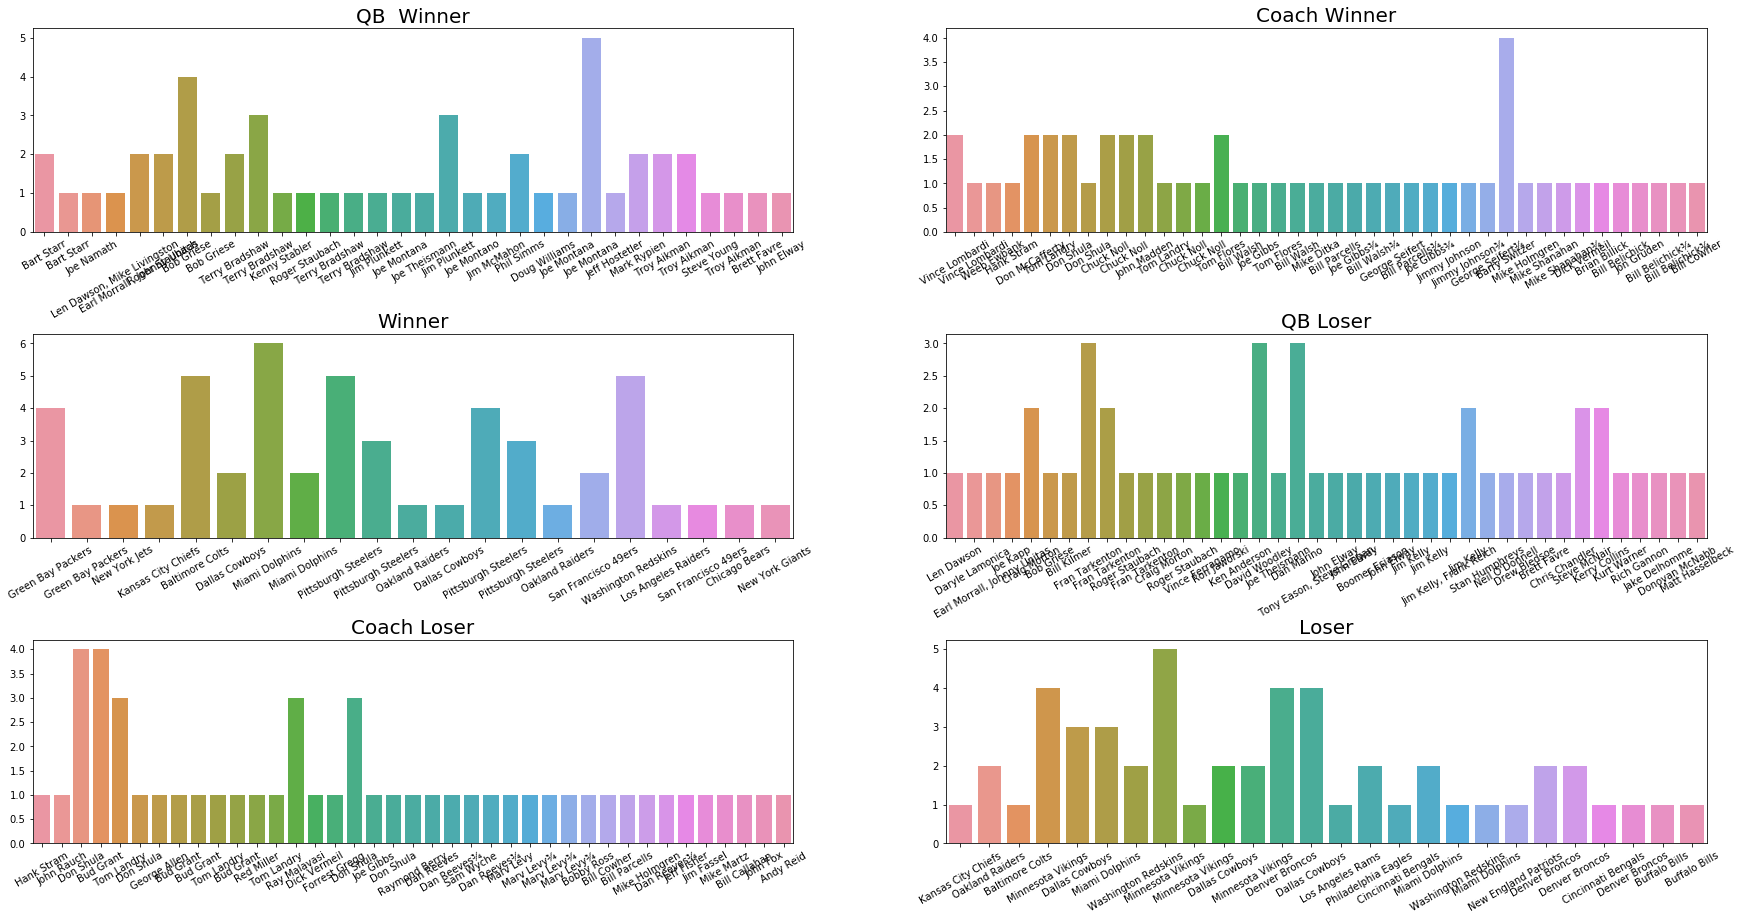

In [8]:
import itertools

team=['QB  Winner', 'Coach Winner', 'Winner','QB Loser','Coach Loser', 'Loser']
plt.subplots(figsize=(30,15))
length=len(team)
for i,j in itertools.zip_longest(team,range(length)):
    plt.subplot((length/3+1),2,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    g=sns.countplot(i,data=super_bowl)
    g.set_xticklabels(super_bowl[i],rotation=30)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

#### Drop City State individual column

In [17]:
super_bowl.drop(['City', 'State'], axis=1, inplace=True)
super_bowl.head()

,Date,SB,Attendance,QB Winner,Coach Winner,Winner,Winning Pts,QB Loser,Coach Loser,Loser,...,Stadium,Point Difference,Referee,Umpire,Head Linesman,Line Judge,Field Judge,Back Judge,Side Judge,CityState
0,15-Jan-67,I,61946,Bart Starr,Vince Lombardi,Green Bay Packers,35,Len Dawson,Hank Stram,Kansas City Chiefs,...,Memorial Coliseum,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Los Angeles,California"
1,14-Jan-68,II,75546,Bart Starr,Vince Lombardi,Green Bay Packers,33,Daryle Lamonica,John Rauch,Oakland Raiders,...,Orange Bowl,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Miami,Florida"
2,12-Jan-69,III,75389,Joe Namath,Weeb Ewbank,New York Jets,16,"Earl Morrall, Johnny Unitas",Don Shula,Baltimore Colts,...,Orange Bowl,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Miami,Florida"
3,11-Jan-70,IV,80562,"Len Dawson, Mike Livingston",Hank Stram,Kansas City Chiefs,23,Joe Kapp,Bud Grant,Minnesota Vikings,...,Tulane Stadium,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"New Orleans,Louisiana"
4,17-Jan-71,V,79204,"Earl Morrall , Johnny Unitas",Don McCafferty,Baltimore Colts,16,Craig Morton,Tom Landry,Dallas Cowboys,...,Orange Bowl,3,Norm Schachter,Paul Trepinski,Ed Marion,Jack Fette,Fritz Graf,Hugh Gamber,NaN,"Miami,Florida"


#### Scatter Plot 

C:\Users\Arshad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


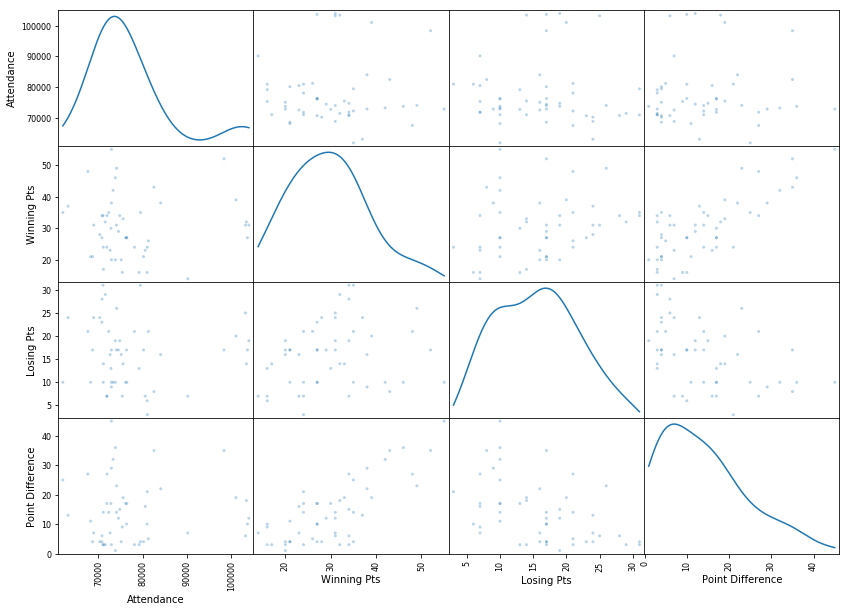

In [15]:
pd.scatter_matrix(super_bowl, alpha=0.3, figsize=(14,10), diagonal = 'kde')
plt.show()